In [1]:
# import os 
# os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] ='false'
# os.environ['XLA_PYTHON_CLIENT_ALLOCATOR']='platform'
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def image_show(X, y, index):
    plt.figure(figsize=(5, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

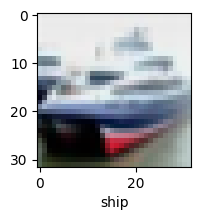

In [11]:
image_show(X_test, y_test, 1)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8040 - accuracy: 0.3600
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6187 - accuracy: 0.4296
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5325 - accuracy: 0.4614
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4755 - accuracy: 0.4819
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4241 - accuracy: 0.5012
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3789 - accuracy: 0.5141
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3423 - accuracy: 0.5302
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3060 - accuracy: 0.5422
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2741 - accuracy: 0.5541
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.240

In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3636 - accuracy: 0.5176


[1.363599181175232, 0.5175999999046326]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_n = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_n))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.59      0.62      0.61      1000
           1       0.49      0.81      0.61      1000
           2       0.38      0.51      0.43      1000
           3       0.35      0.40      0.37      1000
           4       0.54      0.30      0.39      1000
           5       0.58      0.26      0.36      1000
           6       0.48      0.73      0.57      1000
           7       0.65      0.57      0.61      1000
           8       0.69      0.58      0.63      1000
           9       0.72      0.40      0.51      1000

    accuracy                           0.52     10000
   macro avg       0.55      0.52      0.51     10000
weighted avg       0.55      0.52      0.51     10000



In [17]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), # filters size and kernel size and relu , this is the convolutional + relu layer
    keras.layers.MaxPooling2D((2,2)), # size of the pooling grid this is the pooling layer
    
    keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'), # as we know we can add as much layers we want of convolutional and pooling
    keras.layers.MaxPooling2D((2,2)),
    
    # below is the normal ANN
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4625 - accuracy: 0.4745
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1002 - accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9677 - accuracy: 0.6636
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8861 - accuracy: 0.6934
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8194 - accuracy: 0.7150
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7640 - accuracy: 0.7352
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7185 - accuracy: 0.7490
Epoch 8/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6731 - accuracy: 0.7676
Epoch 9/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6319 - accuracy: 0.7799
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.598

In [ ]:
%%timeit -n1 -r1 # this will tell us the time it took to finist the trainnig
with tf.device('/CPU:0'): # running trainnig on CPU
    cpu_model = cnn
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
image_show(X_test, y_test, 1)

In [ ]:
y_pred_c = cnn.predict(X_test) 

In [ ]:
y_classes = [np.argmax(element) for element in y_pred_c]

In [ ]:
image_show(X_test, y_test, 2)

In [ ]:
classes[y_classes[2]]

In [ ]:
print(classification_report(y_test, y_classes))